<a href="https://colab.research.google.com/github/PerisN/Managing-The-Quality-Metric-Of-Global-Ecological-Footprint/blob/main/Ecological_Footprint_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Managing the Quality Metric Of The Global Ecological Footprint**

In [17]:
import numpy as np
import pandas as pd

from scipy.stats import skew, kurtosis

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data

df = pd.read_csv('/content/drive/MyDrive/Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


### **Understanding the data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [4]:
# Summary statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
tau1,10000.0,5.250000,2.742548,0.500793,2.874892,5.250004,7.624690,9.999469
tau2,10000.0,5.250001,2.742549,0.500141,2.875140,5.249981,7.624893,9.999837
tau3,10000.0,5.250004,2.742549,0.500788,2.875522,5.249979,7.624948,9.999450
tau4,10000.0,5.249997,2.742556,0.500473,2.874950,5.249734,7.624838,9.999443
p1,10000.0,3.750000,0.752160,1.582590,3.218300,3.751025,4.282420,5.864418
p2,10000.0,-1.250000,0.433035,-1.999891,-1.624901,-1.249966,-0.874977,-0.500108
p3,10000.0,-1.250000,0.433035,-1.999945,-1.625025,-1.249974,-0.875043,-0.500072
p4,10000.0,-1.250000,0.433035,-1.999926,-1.624960,-1.250007,-0.875065,-0.500025
g1,10000.0,0.525000,0.274256,0.050009,0.287521,0.525009,0.762435,0.999937
g2,10000.0,0.525000,0.274255,0.050053,0.287552,0.525003,0.762490,0.999944


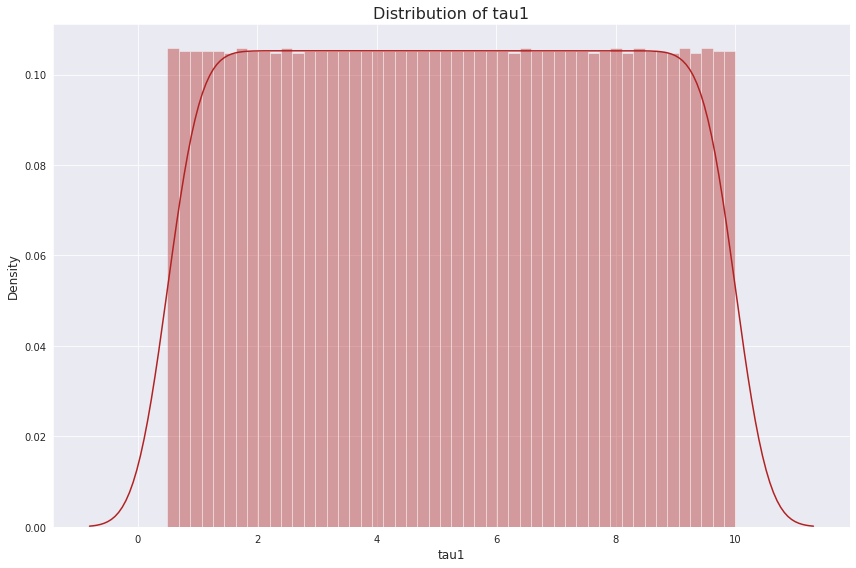

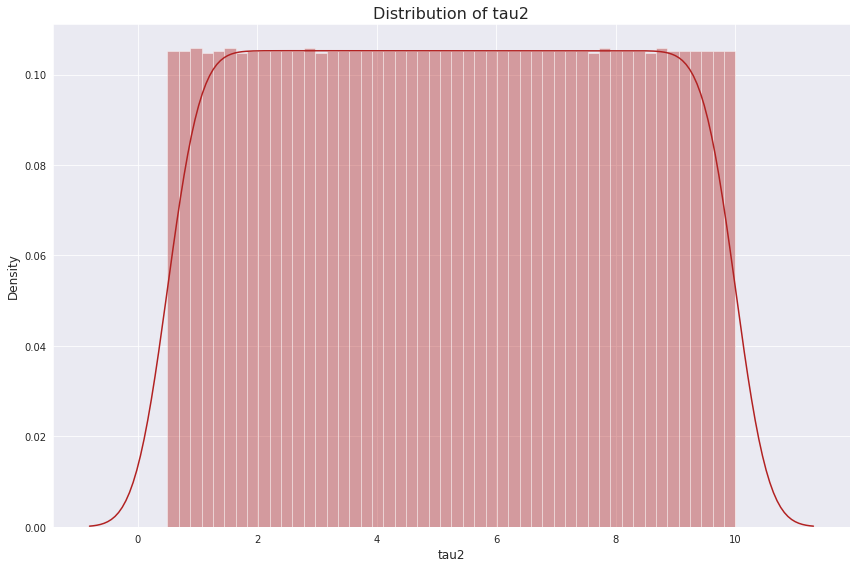

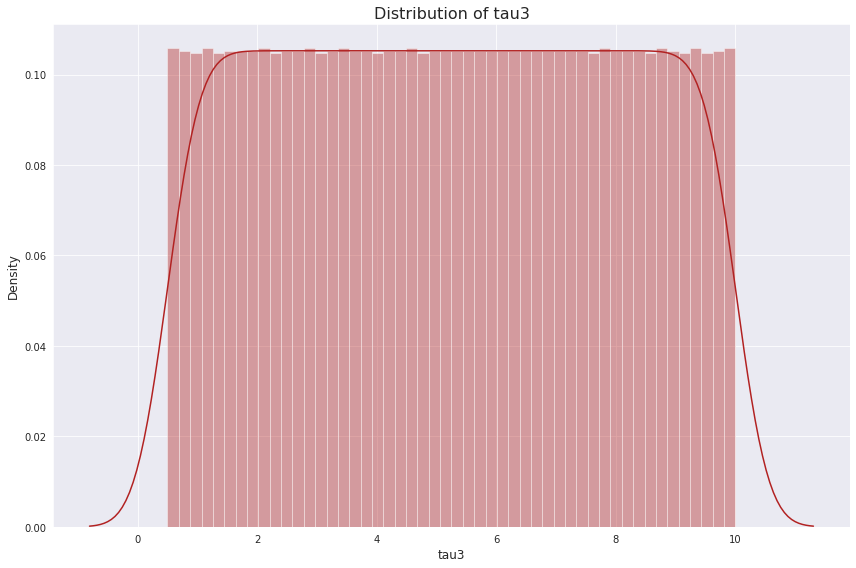

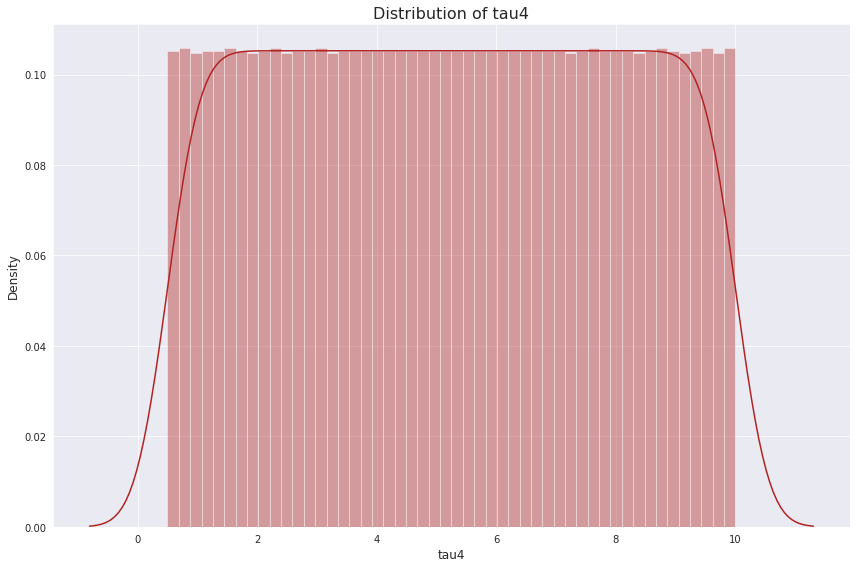

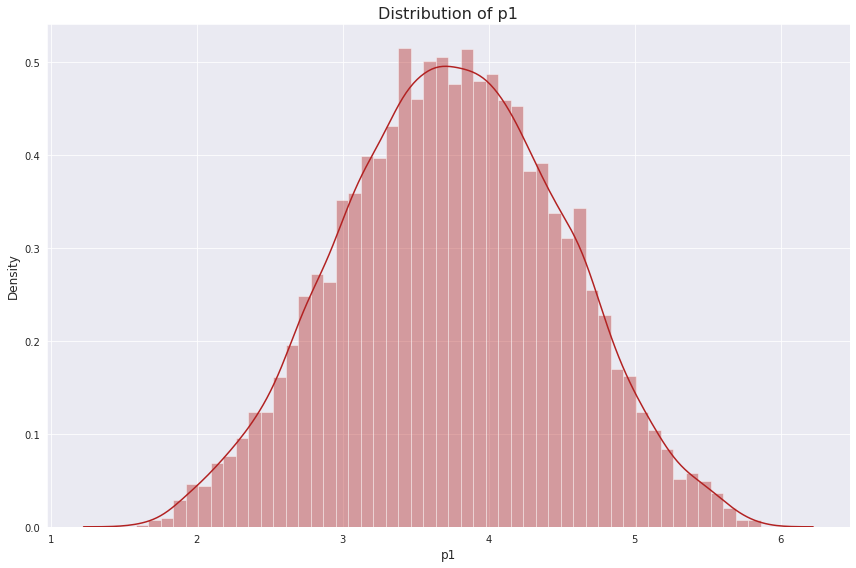

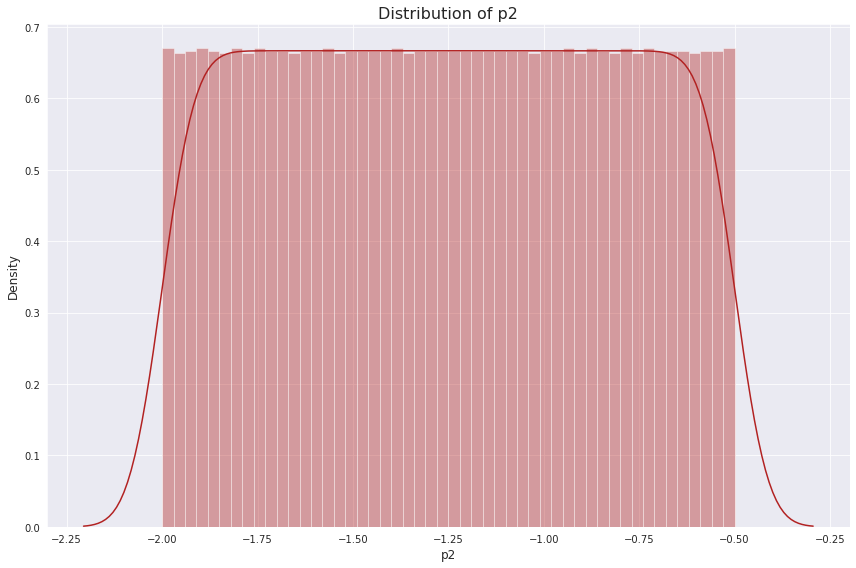

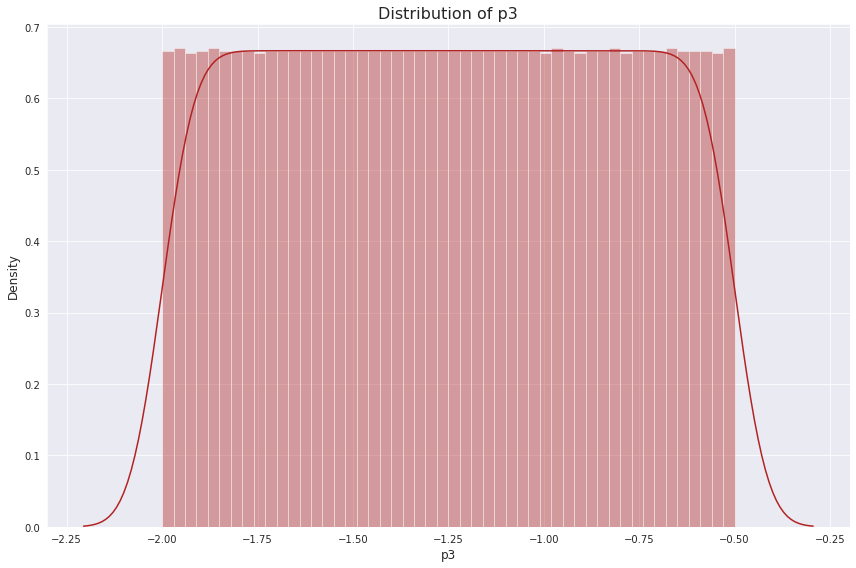

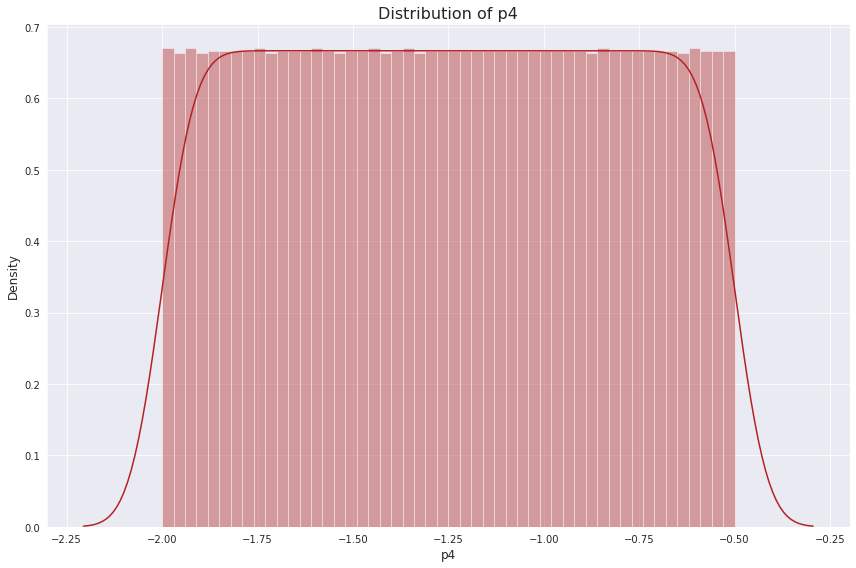

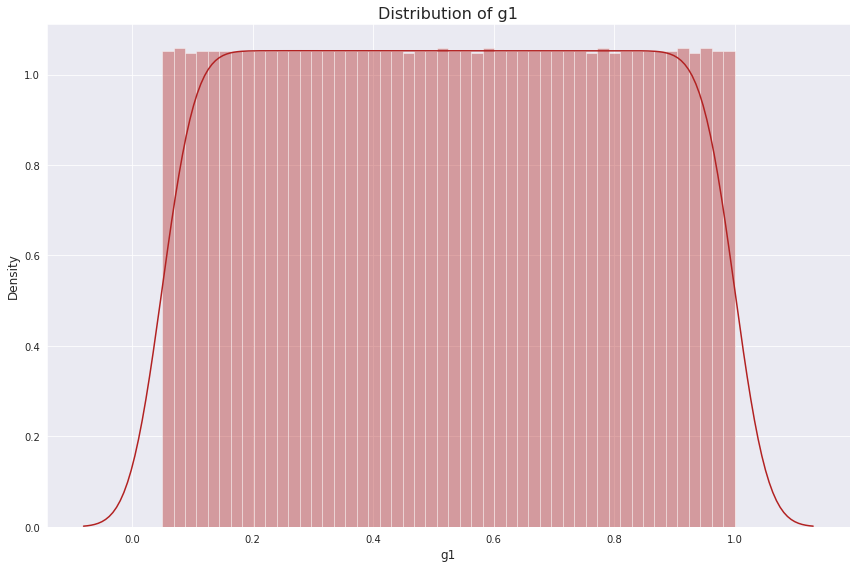

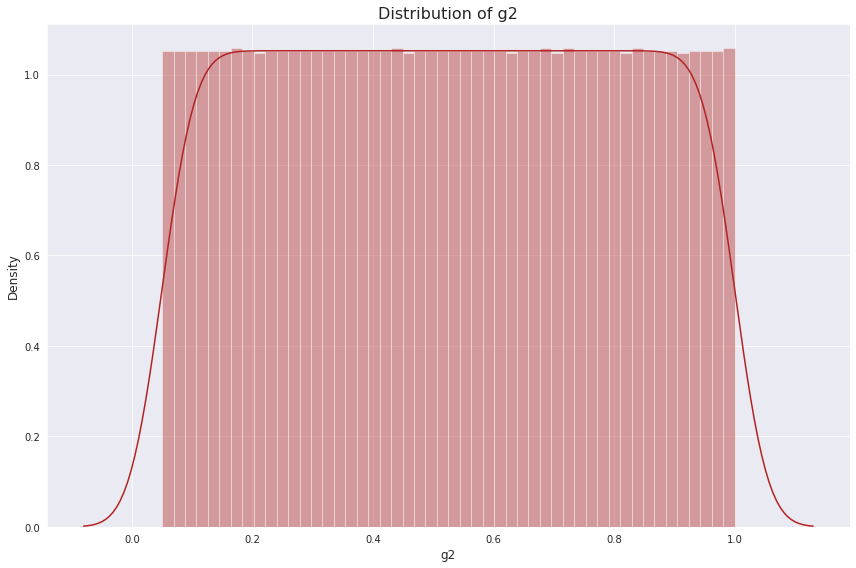

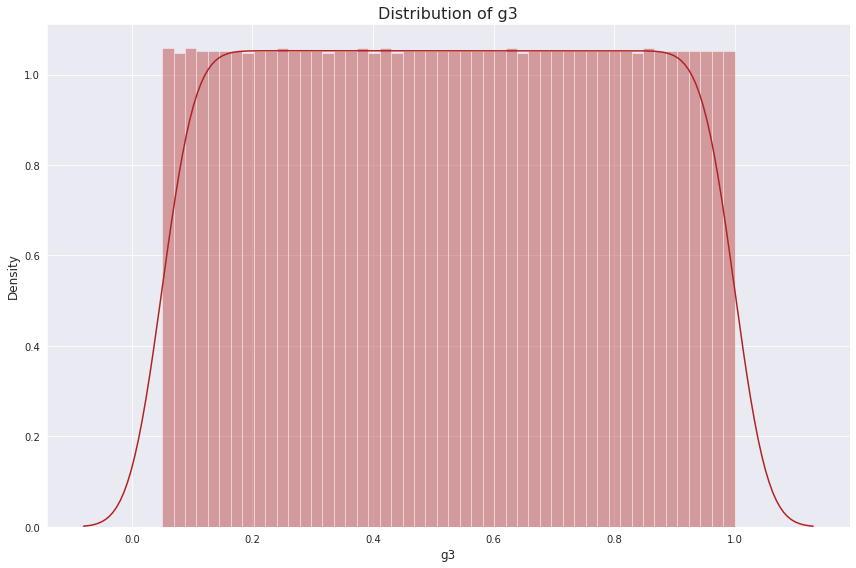

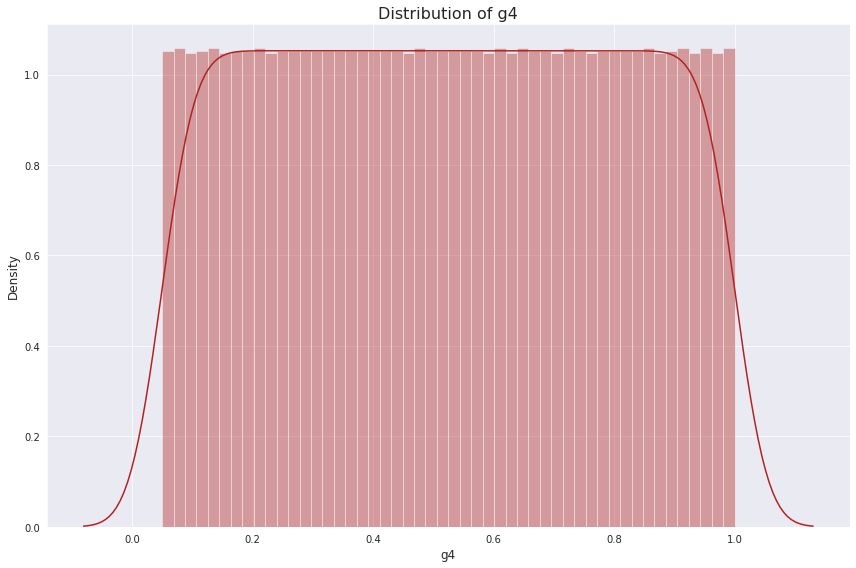

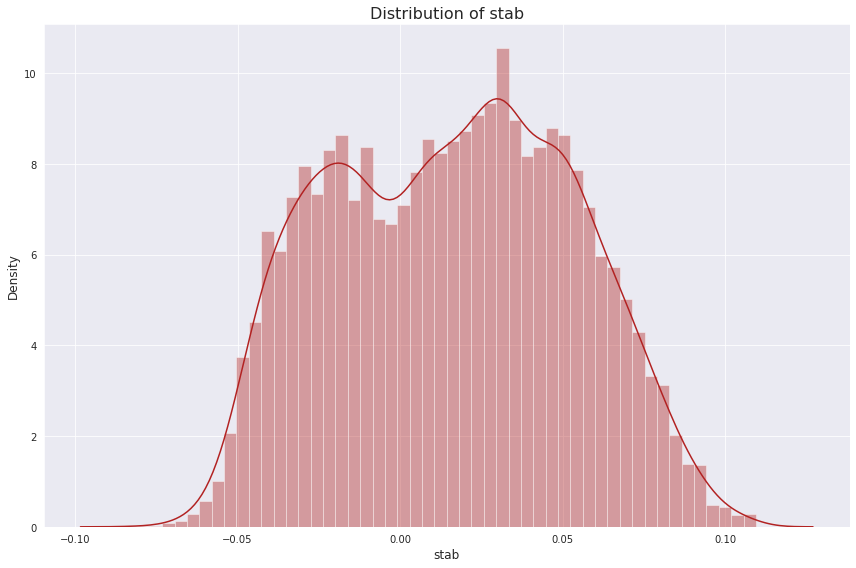

In [20]:
# Plot the numeric variables

num_cols = df.drop(columns=['stabf'])

sns.set_style("darkgrid")

for column in num_cols:
    plt.figure(figsize=(12, 8))
    sns.distplot(df[column], bins=50, color='firebrick')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.tight_layout()
    plt.show()

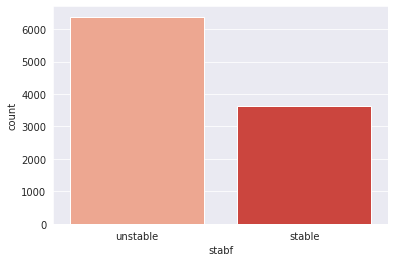

In [18]:
# Plot the categorical variable

sns.countplot(df['stabf'], palette= 'Reds');

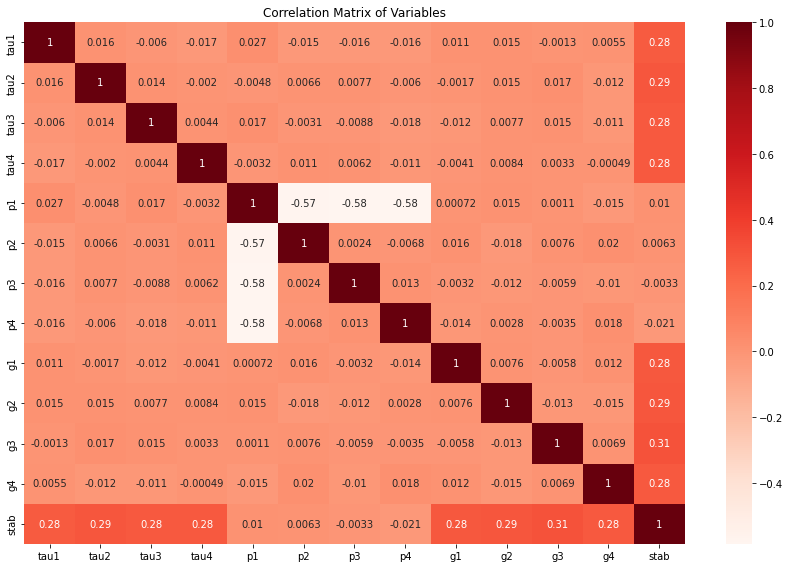

In [6]:
# Create a correlation matrix
corr = df.corr()

# Plot the heatmap plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='Reds', annot=True)
plt.title('Correlation Matrix of Variables')
plt.tight_layout()

plt.show()

**Findings:**
1. All numeric variables except p1 and stab have uniform distributions. They instead have normal distributions.
2. 'p1' is highly correlated with 'p2', 'p3' and 'p4' since there is a direct relationship; p1 = abs(p2 + p3 + p4). They, however, have a weak correlation with the target variable, 'stabf'.
3. 'stab' is highly correlated with 'stabf' because they have a direct relationship; when 'stab' is positive , the system is linearly unstable and vice versa. This variable will be dropped. 
4. The target variable stabf is imbalanced and will therefore be biased towards the system being unstable. 

##**Data Pre-processing**